# COAI FISH PROJECT

Code by Kendall Fronabarger

## When the trouttrain and trouttest folders are created go in and create a totalTrout photo in each. very important to do this bc it ensures the code works. 

## The species chosen for this project were derived from resources provided by the Colorado Parks and Wildlife services containing accurate information regarding local Colorado species of fish, so this data is verifibly accurate.

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:

pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
%matplotlib inline
from PIL import Image
import glob
import os
import shutil
import pathlib
import random
import glob
import matplotlib.image as mpimg # for loading in images
from pathlib import Path

2023-03-06 23:43:12.021222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 23:43:12.226519: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-06 23:43:12.234086: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-06 23:43:12.234130: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [4]:
import zipfile
with zipfile.ZipFile("trout_zip.zip" , "r") as zip_ref:
    zip_ref.extractall("trouttrain")

In [5]:
myfile="Macintosh HD/Users/kendall/Dropbox/mac/Downloads/trout zip.zip" #Mac absolute path
os.path.isfile(myfile) #check if Python can find my file 

False

The above is importing all of the required packages in order to ensure the code will be able to run. There is test data and training data that needs to be included, so it is extracted from a zip file.

# in order for this to work one absolutely must create a folder named total 
in both the training and test folders respctively.


In [6]:
trainlabels = []

In [7]:
im_list_brook=[]

for file in glob.glob("trouttrain/trout zip/brookTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_brook.append(im)
    trainlabels.append(0)
    
print(len(im_list_brook))

48


There are 48 brook trout images.

In [8]:
im_list_brown=[]

for file in glob.glob("trouttrain/trout zip/brownTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_brown.append(im)
    trainlabels.append(1)
    
print(len(im_list_brown))

56


There are 56 brown trout images.

In [9]:
im_list_cutthroat=[]

for file in glob.glob("trouttrain/trout zip/cutthroatTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_cutthroat.append(im)
    trainlabels.append(2)
    
print(len(im_list_cutthroat))

58


There are 58 cut throat trout images.

In [10]:
im_list_mackinaw=[]

for file in glob.glob("trouttrain/trout zip/mackinawTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_mackinaw.append(im)
    trainlabels.append(3)
    
print(len(im_list_mackinaw))

54


There are 54 mackinaw trout images.

In [11]:
im_list_rainbow=[]

for file in glob.glob("trouttrain/trout zip/rainbowTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_rainbow.append(im)
    trainlabels.append(4)
    
print(len(im_list_rainbow))

66


There are 66 rainbow trout images.

In [12]:
trainlabels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


Each species is labled by a number, which is how the algorithim can determine what fish is what number. These are the training labels for every fish ordered numerically.

In [13]:
imgdirect_path = pathlib.Path("trouttrain/trout zip/brookTrout")

brookfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this train data list is helpful and ill later do this for the test frames smaller as well
print(len(brookfile_list))

48


In [14]:
imgdirect_path = pathlib.Path("trouttrain/trout zip/brownTrout")

brownfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this train data list is helpful and ill later do this for the test frames smaller as well
print(len(brownfile_list))

56


In [15]:
imgdirect_path = pathlib.Path("trouttrain/trout zip/cutthroatTrout")

cutthroatfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this train data list is helpful and ill later do this for the test frames smaller as well
print(len(cutthroatfile_list))

58


In [16]:
imgdirect_path = pathlib.Path("trouttrain/trout zip/mackinawTrout")

mackinawfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this train data list is helpful and ill later do this for the test frames smaller as well
print(len(mackinawfile_list))

54


In [17]:
imgdirect_path = pathlib.Path("trouttrain/trout zip/rainbowTrout")

rainbowfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this train data list is helpful and ill later do this for the test frames smaller as well
print(len(rainbowfile_list))

66


The above code is pulling image files for the fish, so they can be imported and viewed.

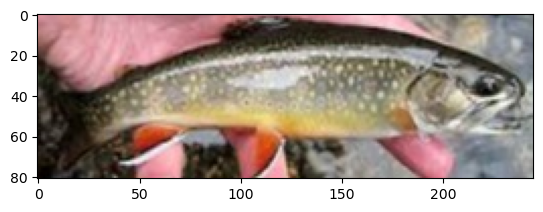

In [18]:
plt.imshow(im_list_brook[0])

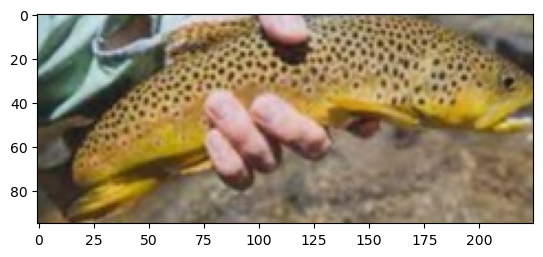

In [19]:
plt.imshow(im_list_brown[0])

In [20]:
brooker_list = []
browner_list = []
cutthroater_list = []
rainbower_list = []
mackinawer_list = []

In [21]:
bigimlist = im_list_brown + im_list_brook + im_list_rainbow +im_list_cutthroat + im_list_mackinaw

In [22]:
print(len(bigimlist))

282


This is to prepare lists of images resized and grouped by fish to be identified by the algorithim, with one large image list being there as well.

In [23]:
trainlabels[1:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [24]:
brooker_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttrain/trout zip/brookTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        brooker_list.append(standard_im)
standardize_inputs(im_list_brook)

In [25]:
browner_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttrain/trout zip/brownTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        browner_list.append(standard_im)
standardize_inputs(im_list_brown)

In [26]:
rainbower_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttrain/trout zip/rainbowTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        rainbower_list.append(standard_im)
standardize_inputs(im_list_rainbow)

In [27]:
cutthroater_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttrain/trout zip/cutthroatTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        cutthroater_list.append(standard_im)
standardize_inputs(im_list_cutthroat)

In [28]:
mackinawer_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttrain/trout zip/mackinawTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        mackinawer_list.append(standard_im)
standardize_inputs(im_list_mackinaw)

In [29]:
print(len(browner_list))

56


In [30]:
im_list_brook[0]

array([[[220, 150, 161],
        [221, 151, 162],
        [219, 151, 162],
        ...,
        [145, 153, 155],
        [133, 141, 143],
        [131, 136, 139]],

       [[215, 145, 156],
        [214, 146, 157],
        [215, 147, 158],
        ...,
        [138, 146, 148],
        [133, 141, 143],
        [132, 137, 140]],

       [[207, 140, 149],
        [208, 141, 150],
        [209, 141, 152],
        ...,
        [123, 131, 134],
        [125, 133, 136],
        [129, 134, 138]],

       ...,

       [[ 11,   5,   5],
        [  9,   4,   1],
        [  7,   1,   1],
        ...,
        [156, 158, 157],
        [157, 159, 158],
        [155, 159, 158]],

       [[  8,   2,   2],
        [  7,   1,   1],
        [  5,   0,   0],
        ...,
        [163, 165, 164],
        [167, 171, 170],
        [168, 172, 171]],

       [[  9,   1,   0],
        [  9,   4,   1],
        [  7,   3,   2],
        ...,
        [159, 163, 162],
        [169, 175, 173],
        [168, 177, 174]]

Now we have the images broken down numerically in arrays so it can be projected in a smaller form that can be identified by the algorithim.

In [31]:
im_list_brook[1].shape

(88, 247, 3)

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>brook trout</td>
  </tr>
  <tr>
    <td>1</td>
    <td>brown trout</td>
  </tr>
    <tr>
    <td>2</td>
    <td>cutthroat trout</td>
  </tr>
    <tr>
    <td>3</td>
    <td>mackinaw trout</td>
  </tr>
    <tr>
    <td>4</td>
    <td>rainbow trout</td>
  </tr>
</table>


In [32]:
class_names = ['brook trout','brown trout','cutthroat trout','mackinaw trout','rainbow trout']
class_labels = {0:'brook trout',1:'brown trout',2:'cutthroat trout',3:'mackinaw trout',4:'rainbow trout'}

In [33]:
brookfile_list[10]

'trouttrain/trout zip/brookTrout/brookTrout21.jpg'

In [34]:
total_file_list = brookfile_list+brownfile_list+rainbowfile_list+cutthroatfile_list+mackinawfile_list

In [35]:
print(len(total_file_list))

282


A comprehensive file list exporting these new photos and then importing them as one large list so the training data can then be functional.

In [36]:
in_folder1 = ('senior capstone/trouttrain/trout zip/brookTrout')
in_folder2 = ('senior capstone/trouttrain/trout zip/brownTrout')
in_folder5 = ('senior capstone/trouttrain/trout zip/rainbowTrout')
in_folder3 = ('senior capstone/trouttrain/trout zip/cutthroatTrout')
in_folder4 = ('senior capstone/trouttrain/trout zip/mackinawTrout')
out_folder = ('senior capstone/trouttrain/trout zip/totalTrout')
file_types = ('.jpg','.png', '.jpeg')   
all_images = []
    # If we just want to optimize the images without resizing them, we can

# leave the max width input empty

    #Create ouput folder
for file_type in file_types: 
        all_images.extend(glob.glob(in_folder1 + '/*' + file_type))
        all_images.extend(glob.glob(in_folder2 + '/*' + file_type))
        all_images.extend(glob.glob(in_folder3 + '/*' + file_type))
        all_images.extend(glob.glob(in_folder4 + '/*' + file_type))
        all_images.extend(glob.glob(in_folder5 + '/*' + file_type))
for index, img in enumerate(sorted(all_images)):
        img_path = Path(img)
        file_name = img_path.name
        img_width, img_height = 32, 32
        outF = out_folder + '/' + file_name
        if Path(outF).is_file():
            continue
        else:
            with Image.open(img) as inF:
                inF.save(outF,inF.format)



In [37]:
imgdirect_path = pathlib.Path("trouttrain/trout zip/totalTrout")

completefiletrain_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])


In [38]:
completefiletrain_list[1:100]

['trouttrain/trout zip/totalTrout/brookTrout10.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout12.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout14.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout15.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout16.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout17.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout18.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout19.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout2.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout21.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout22.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout23.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout24.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout25.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout29.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout3.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout30.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout31.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout32.j

In [39]:
print(len(completefiletrain_list))

282


In [40]:
brookfile_list[1:10]

['trouttrain/trout zip/brookTrout/brookTrout10.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout12.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout14.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout15.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout16.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout17.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout18.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout19.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout2.jpg']

In [41]:
brookfile_list = [item.replace('senior capstone/trouttrain/trout zip/brookTrout/', '') 
                  for item in brookfile_list]
brownfile_list = [item.replace('senior capstone/trouttrain/trout zip/brownTrout/', '')
                    for item in brownfile_list]

cutthroatfile_list = [item.replace('senior capstone/trouttrain/trout zip/cutthroatTrout/', '') 
                  for item in cutthroatfile_list]

mackinawfile_list = [item.replace('senior capstone/trouttrain/trout zip/mackinawTrout/', '') 
                  for item in mackinawfile_list]
                
rainbowfile_list = [item.replace('senior capstone/trouttrain/trout zip/rainbowTrout/', '') 
                  for item in rainbowfile_list]

completefiletrain_list = [item.replace('senior capstone/trouttrain/trout zip/totalTrout/', '') 
                  for item in completefiletrain_list]

Making sure we have accurate images in these files that are in the array format

In [42]:
brookfile_list[1:10]

['trouttrain/trout zip/brookTrout/brookTrout10.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout12.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout14.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout15.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout16.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout17.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout18.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout19.jpg',
 'trouttrain/trout zip/brookTrout/brookTrout2.jpg']

In [43]:
completefiletrain_list[0:10]

['trouttrain/trout zip/totalTrout/brookTrout0.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout10.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout12.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout14.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout15.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout16.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout17.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout18.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout19.jpg',
 'trouttrain/trout zip/totalTrout/brookTrout2.jpg']

In [44]:
completefiletrain_list[1]

'trouttrain/trout zip/totalTrout/brookTrout10.jpg'

In [45]:
print(len(trainlabels))

282


In [46]:
trainlabels[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [227]:
completetrainlistarray = []
def standardize_inputing(image_list): 
    for file in sorted(glob.glob("trouttrain/trout zip/totalTrout/*")):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
  
        completetrainlistarray.append(standard_im)
standardize_inputing(completefiletrain_list)

This turns all of the images into the array format

In [228]:
completetrainlistarray[1].shape

(32, 32, 3)

In [229]:
completetrainlistarray[1]

array([[[221, 242, 245],
        [213, 233, 240],
        [216, 236, 243],
        ...,
        [253,  47,   0],
        [251,  48,   1],
        [247,  51,   1]],

       [[224, 245, 245],
        [216, 236, 243],
        [217, 237, 244],
        ...,
        [254,  45,   3],
        [255,  42,   5],
        [255,  44,   2]],

       [[228, 247, 245],
        [218, 242, 246],
        [219, 238, 245],
        ...,
        [253,  46,   4],
        [251,  47,   1],
        [248,  47,   0]],

       ...,

       [[219, 137, 134],
        [204, 116, 111],
        [231, 155, 152],
        ...,
        [ 97, 100, 115],
        [ 99,  99, 115],
        [ 97, 101, 115]],

       [[160,  92,  81],
        [145,  74,  60],
        [162,  93,  82],
        ...,
        [ 90,  96, 110],
        [ 93,  95, 110],
        [ 88,  94, 108]],

       [[ 96,  46,  31],
        [ 74,  25,  16],
        [ 69,  23,  15],
        ...,
        [ 93,  94, 112],
        [ 94,  97, 106],
        [ 87,  93, 105]]

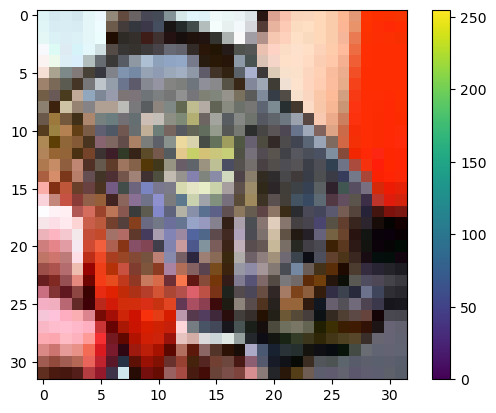

In [230]:
plt.figure()
plt.imshow(completetrainlistarray[1])
plt.colorbar()
plt.grid(False)
plt.show()

And heres a visual of the fish

In [231]:
totalim_list = brooker_list + browner_list + rainbower_list + cutthroater_list + mackinawer_list

In [232]:
trainlabelsnp = np.asarray(trainlabels)

In [233]:
trainimagenp = np.asarray(completetrainlistarray)

In [234]:
trainimagenps = np.array(completefiletrain_list)

In [235]:
trainimagenp.shape


(282, 32, 32, 3)

In [236]:
trainlabelsnp.shape

(282,)

In [237]:
trainlabelsnp[1]

0

In [238]:
trainlabelsnp.shape

(282,)

In [239]:
trainlabelsnp.shape

(282,)

Making the training labels and images into a lot of arrays so that they can be rearranged and shuffled for training purposes.

In [240]:
# trainlabelsnp, trainimagenp, completefiletrain_list, trainlabels

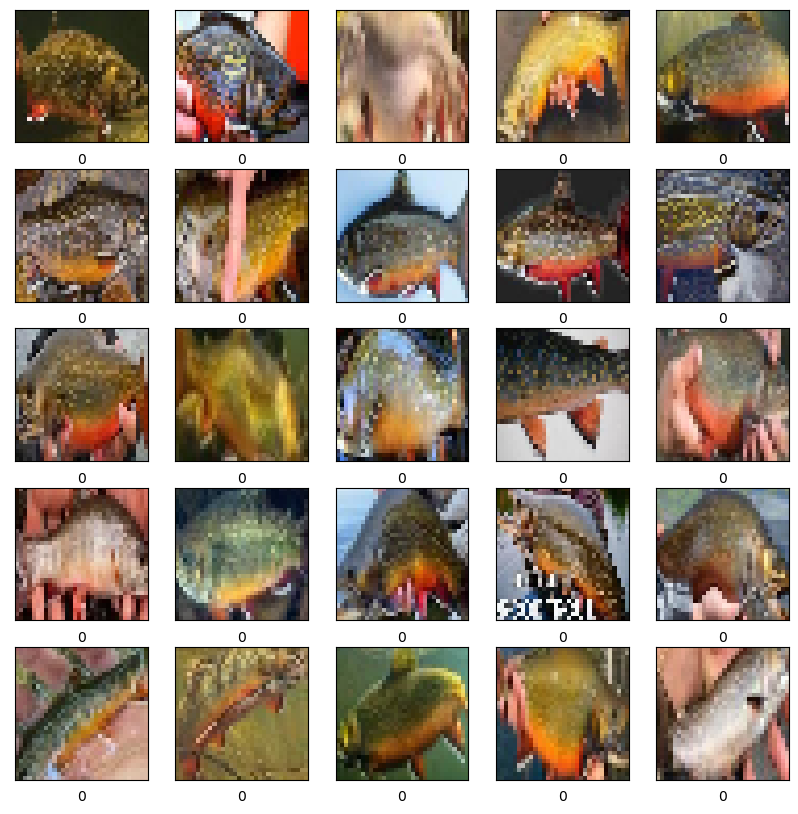

In [241]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(completetrainlistarray[i], cmap=plt.cm.binary)
    plt.xlabel(trainlabelsnp[trainlabelsnp[i]])
plt.show()

Above are multiple projected fish! So we know our process has worked thusfar. The number below is the label while the image is of the fish.

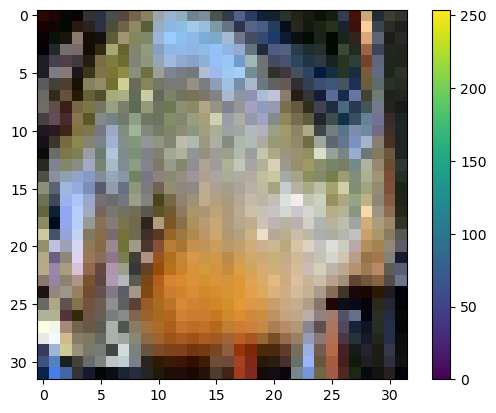

In [242]:
plt.figure()
plt.imshow(trainimagenp[12])
plt.colorbar()
plt.grid(False)
plt.show()

# NOW FOR THE TESTING DATA

The same exact process essentially is done to the testing data as it is the training data. This may be skipped if so desired, but just know this is the same process for formating the images and organizing the labels. Its only now using testing data instead of training data, so this is data we dont want to shuffle into the alrogithim until we want it to start making predictions.

In [243]:
import zipfile
with zipfile.ZipFile("trout_zip.zip" , "r") as zip_ref:
    zip_ref.extractall("trouttest")

In [244]:
testlabels = []

In [245]:
testim_list_brook=[]

for file in glob.glob("trouttest/trout zip/brookTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    testim_list_brook.append(im)
    testlabels.append(0)
    
print(len(testim_list_brook))

48


In [246]:
testim_list_brown=[]

for file in glob.glob("trouttest/trout zip/brownTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    testim_list_brown.append(im)
    testlabels.append(1)
    
print(len(testim_list_brown))

56


In [247]:
testim_list_cutthroat=[]

for file in glob.glob("trouttest/trout zip/cutthroatTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    testim_list_cutthroat.append(im)
    testlabels.append(2)
    
print(len(testim_list_cutthroat))

58


In [248]:
testim_list_mackinaw=[]

for file in glob.glob("trouttest/trout zip/mackinawTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    testim_list_mackinaw.append(im)
    testlabels.append(3)
    
print(len(testim_list_mackinaw))

54


In [249]:
testim_list_rainbow=[]

for file in glob.glob("trouttest/trout zip/rainbowTrout/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    testim_list_rainbow.append(im)
    testlabels.append(4)
    
print(len(testim_list_rainbow))

66


In [250]:
imgdirect_path = pathlib.Path("trouttest/trout zip/brookTrout")

testbrookfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this test data list is helpful and ill later do this for the test frames smaller as well
print(len(testbrookfile_list))

48


In [251]:
imgdirect_path = pathlib.Path("trouttest/trout zip/brownTrout")

testbrownfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this test data list is helpful and ill later do this for the test frames smaller as well
print(len(testbrownfile_list))

56


In [252]:
imgdirect_path = pathlib.Path("trouttest/trout zip/cutthroatTrout")

testcutthroatfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this test data list is helpful and ill later do this for the test frames smaller as well
print(len(testcutthroatfile_list))

58


In [253]:
imgdirect_path = pathlib.Path("trouttest/trout zip/mackinawTrout")

testmackinawfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this test data list is helpful and ill later do this for the test frames smaller as well
print(len(testmackinawfile_list))

54


In [254]:
imgdirect_path = pathlib.Path("trouttest/trout zip/rainbowTrout")

testrainbowfile_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])

# bear with me this test data list is helpful and ill later do this for the test frames smaller as well
print(len(testrainbowfile_list))

66


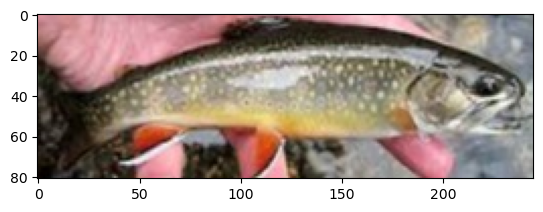

In [255]:
plt.imshow(testim_list_brook[0])

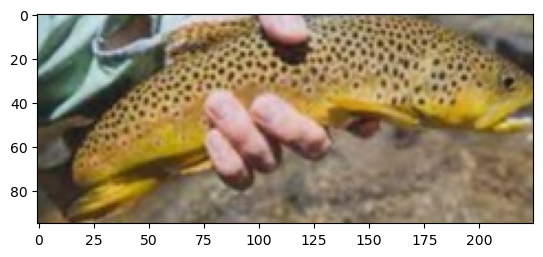

In [256]:
plt.imshow(testim_list_brown[0])

In [257]:
testbrooker_list = []
testbrowner_list = []
testrainbower_list = []
testcutthroater_list = []
testmackinawer_list = []

In [258]:
testbigimlist = testim_list_brown + testim_list_brook + testim_list_rainbow + testim_list_cutthroat + testim_list_mackinaw

In [259]:
print(len(testbigimlist))

282


In [260]:
testbrooker_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttest/trout zip/brookTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        testbrooker_list.append(standard_im)
standardize_inputs(testim_list_brook)

In [261]:
testbrowner_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttest/trout zip/brownTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        testbrowner_list.append(standard_im)
standardize_inputs(testim_list_brown)

In [262]:
testcutthroater_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttest/trout zip/cutthroatTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        testcutthroater_list.append(standard_im)
standardize_inputs(testim_list_cutthroat)

In [263]:
testmackinawer_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttest/trout zip/mackinawTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        testmackinawer_list.append(standard_im)
standardize_inputs(testim_list_mackinaw)

In [264]:
testrainbower_list = []
def standardize_inputs(image_list): 
    for file in glob.glob('trouttest/trout zip/rainbowTrout/*'):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        testrainbower_list.append(standard_im)
standardize_inputs(testim_list_rainbow)

In [265]:
print(len(testbrowner_list))

56


In [266]:
testim_list_brook[0]

array([[[220, 150, 161],
        [221, 151, 162],
        [219, 151, 162],
        ...,
        [145, 153, 155],
        [133, 141, 143],
        [131, 136, 139]],

       [[215, 145, 156],
        [214, 146, 157],
        [215, 147, 158],
        ...,
        [138, 146, 148],
        [133, 141, 143],
        [132, 137, 140]],

       [[207, 140, 149],
        [208, 141, 150],
        [209, 141, 152],
        ...,
        [123, 131, 134],
        [125, 133, 136],
        [129, 134, 138]],

       ...,

       [[ 11,   5,   5],
        [  9,   4,   1],
        [  7,   1,   1],
        ...,
        [156, 158, 157],
        [157, 159, 158],
        [155, 159, 158]],

       [[  8,   2,   2],
        [  7,   1,   1],
        [  5,   0,   0],
        ...,
        [163, 165, 164],
        [167, 171, 170],
        [168, 172, 171]],

       [[  9,   1,   0],
        [  9,   4,   1],
        [  7,   3,   2],
        ...,
        [159, 163, 162],
        [169, 175, 173],
        [168, 177, 174]]

In [267]:
testim_list_brook[1].shape

(88, 247, 3)

In [268]:
testbrookfile_list[10]

'trouttest/trout zip/brookTrout/brookTrout21.jpg'

In [269]:
test_total_file_list = testbrookfile_list+testbrownfile_list+testrainbowfile_list+testcutthroatfile_list+testmackinawfile_list

In [270]:
print(len(test_total_file_list))

282


In [271]:
in_folder1 = ('senior capstone/trouttest/trout zip/brookTrout')
in_folder2 = ('senior capstone/trouttest/trout zip/brownTrout')
in_folder5 = ('senior capstone/trouttest/trout zip/rainbowTrout')
in_folder3 = ('senior capstone/trouttest/trout zip/cutthroatTrout')
in_folder4 = ('senior capstone/trouttest/trout zip/mackinawTrout')
out_folder = ('senior capstone/trouttest/trout zip/totalTrout')
file_types = ('.jpg','.png', '.jpeg')   
all_images = []
    # If we just want to optimize the images without resizing them, we can

# leave the max width input empty

    #Create ouput folder
for file_type in file_types: 
        all_images.extend(glob.glob(in_folder1 + '/*' + file_type))
        all_images.extend(glob.glob(in_folder2 + '/*' + file_type))
        all_images.extend(glob.glob(in_folder3 + '/*' + file_type))
        all_images.extend(glob.glob(in_folder4 + '/*' + file_type))
        all_images.extend(glob.glob(in_folder5 + '/*' + file_type))
for index, img in enumerate(sorted(all_images)):
        img_path = Path(img)
        file_name = img_path.name
        img_width, img_height = 32, 32
        outF = out_folder + '/' + file_name
        if Path(outF).is_file():
            continue
        else:
            with Image.open(img) as inF:
                inF.save(outF,inF.format)



In [272]:
imgdirect_path = pathlib.Path("trouttest/trout zip/totalTrout")

completefiletest_list = sorted([str(path) for path in imgdirect_path.glob('*.jpg')])


In [273]:
completefiletest_list[100]

'trouttest/trout zip/totalTrout/brownTrout73.jpg'

In [274]:
testbrookfile_list[1:10]

['trouttest/trout zip/brookTrout/brookTrout10.jpg',
 'trouttest/trout zip/brookTrout/brookTrout12.jpg',
 'trouttest/trout zip/brookTrout/brookTrout14.jpg',
 'trouttest/trout zip/brookTrout/brookTrout15.jpg',
 'trouttest/trout zip/brookTrout/brookTrout16.jpg',
 'trouttest/trout zip/brookTrout/brookTrout17.jpg',
 'trouttest/trout zip/brookTrout/brookTrout18.jpg',
 'trouttest/trout zip/brookTrout/brookTrout19.jpg',
 'trouttest/trout zip/brookTrout/brookTrout2.jpg']

In [275]:
testbrookfile_list = [item.replace('senior capstone/trouttest/trout zip/brookTrout/', '') 
                  for item in testbrookfile_list]
testbrownfile_list = [item.replace('senior capstone/trouttest/trout zip/brownTrout/', '') 
                  for item in testbrownfile_list]
testcutthroatfile_list = [item.replace('senior capstone/trouttest/trout zip/cutthroatTrout/', '') 
                  for item in testcutthroatfile_list]
testmackinawfile_list = [item.replace('senior capstone/trouttest/trout zip/mackinawTrout/', '') 
                  for item in testmackinawfile_list]
testrainbowfile_list = [item.replace('senior capstone/trouttest/trout zip/rainbowTrout/', '') 
                  for item in testrainbowfile_list]

completefiletest_list = [item.replace('senior capstone/trouttest/trout zip/totalTrout/', '') 
                  for item in completefiletest_list]

In [276]:
testbrookfile_list[1:10]

['trouttest/trout zip/brookTrout/brookTrout10.jpg',
 'trouttest/trout zip/brookTrout/brookTrout12.jpg',
 'trouttest/trout zip/brookTrout/brookTrout14.jpg',
 'trouttest/trout zip/brookTrout/brookTrout15.jpg',
 'trouttest/trout zip/brookTrout/brookTrout16.jpg',
 'trouttest/trout zip/brookTrout/brookTrout17.jpg',
 'trouttest/trout zip/brookTrout/brookTrout18.jpg',
 'trouttest/trout zip/brookTrout/brookTrout19.jpg',
 'trouttest/trout zip/brookTrout/brookTrout2.jpg']

In [277]:
completefiletest_list[100:110]

['trouttest/trout zip/totalTrout/brownTrout73.jpg',
 'trouttest/trout zip/totalTrout/brownTrout74.jpg',
 'trouttest/trout zip/totalTrout/brownTrout8.jpg',
 'trouttest/trout zip/totalTrout/brownTrout9.jpg',
 'trouttest/trout zip/totalTrout/cutthroatTrout1.jpg',
 'trouttest/trout zip/totalTrout/cutthroatTrout10.jpg',
 'trouttest/trout zip/totalTrout/cutthroatTrout11.jpg',
 'trouttest/trout zip/totalTrout/cutthroatTrout12.jpg',
 'trouttest/trout zip/totalTrout/cutthroatTrout14.jpg',
 'trouttest/trout zip/totalTrout/cutthroatTrout15.jpg']

In [278]:
print(len(testlabels)) 

282


In [279]:
completefiletest_list[1]

'trouttest/trout zip/totalTrout/brookTrout10.jpg'

In [280]:
testlabels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [281]:
completetestlistarray = []
def standardize_inputing(image_list): 
    for file in sorted(glob.glob("trouttest/trout zip/totalTrout/*")):
        im = mpimg.imread(file)
        image_crop = np.copy(im)
        row_crop = 7
        col_crop = 8
        image_crop = im[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
        standard_im = cv2.resize(image_crop, (32, 32))
        completetestlistarray.append(standard_im)
standardize_inputing(completefiletest_list)

In [282]:
completefiletest_list[1]

'trouttest/trout zip/totalTrout/brookTrout10.jpg'

In [283]:
completetestlistarray[1].shape

(32, 32, 3)

In [284]:
completetestlistarray[1]

array([[[221, 242, 245],
        [213, 233, 240],
        [216, 236, 243],
        ...,
        [253,  47,   0],
        [251,  48,   1],
        [247,  51,   1]],

       [[224, 245, 245],
        [216, 236, 243],
        [217, 237, 244],
        ...,
        [254,  45,   3],
        [255,  42,   5],
        [255,  44,   2]],

       [[228, 247, 245],
        [218, 242, 246],
        [219, 238, 245],
        ...,
        [253,  46,   4],
        [251,  47,   1],
        [248,  47,   0]],

       ...,

       [[219, 137, 134],
        [204, 116, 111],
        [231, 155, 152],
        ...,
        [ 97, 100, 115],
        [ 99,  99, 115],
        [ 97, 101, 115]],

       [[160,  92,  81],
        [145,  74,  60],
        [162,  93,  82],
        ...,
        [ 90,  96, 110],
        [ 93,  95, 110],
        [ 88,  94, 108]],

       [[ 96,  46,  31],
        [ 74,  25,  16],
        [ 69,  23,  15],
        ...,
        [ 93,  94, 112],
        [ 94,  97, 106],
        [ 87,  93, 105]]

In [285]:
testlabelsnp = np.asarray(testlabels)

In [286]:
testimagenp = np.asarray(completetestlistarray)

In [287]:
testimagenp.shape


(282, 32, 32, 3)

In [288]:
testlabelsnp.shape

(282,)

In [289]:
testlabelsnp.shape

(282,)

In [290]:
testlabelsnp.shape

(282,)

In [291]:
testlabelsnp[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [292]:
testlabels[0:30]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [293]:
testimagenp[8]

array([[[36, 36, 36],
        [36, 36, 36],
        [36, 36, 36],
        ...,
        [37, 37, 37],
        [36, 36, 36],
        [36, 36, 36]],

       [[36, 36, 36],
        [36, 36, 36],
        [36, 36, 36],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]],

       [[36, 36, 36],
        [36, 36, 36],
        [36, 36, 36],
        ...,
        [33, 33, 33],
        [36, 36, 36],
        [36, 36, 36]],

       ...,

       [[36, 36, 36],
        [36, 36, 36],
        [36, 36, 36],
        ...,
        [36, 36, 36],
        [33, 33, 33],
        [34, 34, 34]],

       [[36, 36, 36],
        [36, 36, 36],
        [36, 36, 36],
        ...,
        [36, 36, 36],
        [37, 37, 37],
        [36, 36, 36]],

       [[36, 36, 36],
        [36, 36, 36],
        [36, 36, 36],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]]], dtype=uint8)

In [294]:
testlabelsnp.shape

(282,)

In [295]:
testlabelsnp[8]

0

In [296]:
testlabels[8]

0

In [297]:
completefiletest_list[8]

'trouttest/trout zip/totalTrout/brookTrout19.jpg'

In [298]:
testimagenp.shape

(282, 32, 32, 3)

In [299]:
# testlabels, testlabelsnp, completefiletest_list, testimagenp

In [300]:
testlabelsnp[22]

0

In [301]:
completefiletest_list[22]

'trouttest/trout zip/totalTrout/brookTrout36.jpg'

In [302]:
completefiletest_list[59]

'trouttest/trout zip/totalTrout/brownTrout22.jpg'

In [303]:
completefiletest_listnp = np.array(completefiletest_list)
completefiletest_listnp.shape

(282,)

0

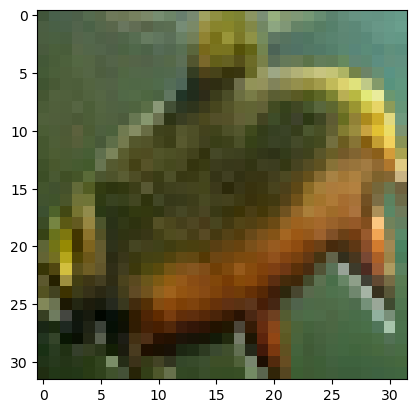

In [304]:
plt.imshow(testimagenp[22])
testlabelsnp[22]

In [305]:
testlabelsnp[22]

0

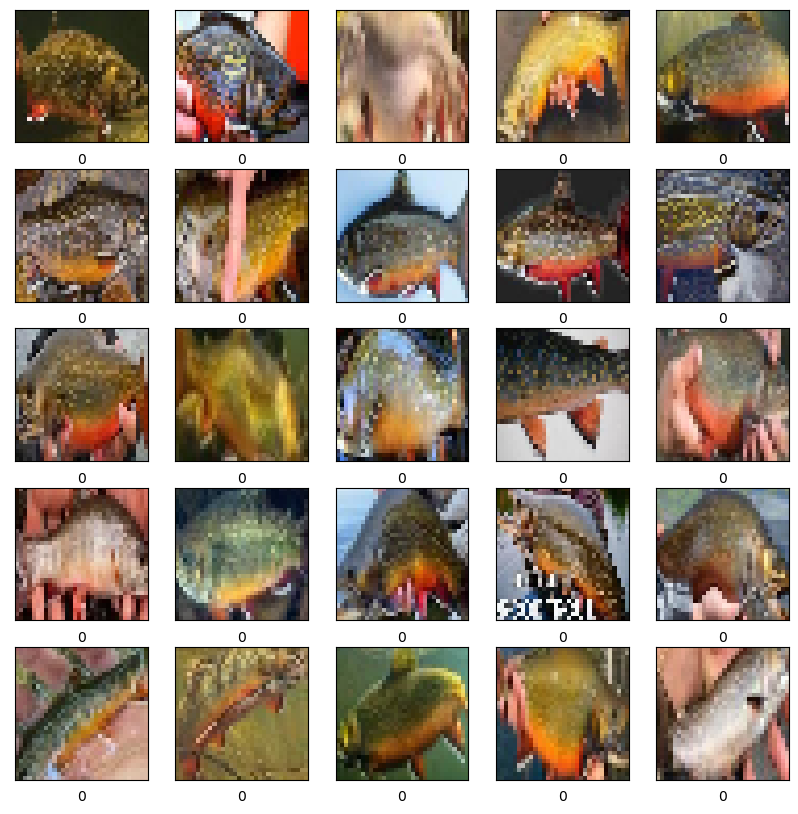

In [306]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testimagenp[i], cmap=plt.cm.binary)
    plt.xlabel(testlabelsnp[i])
plt.show()

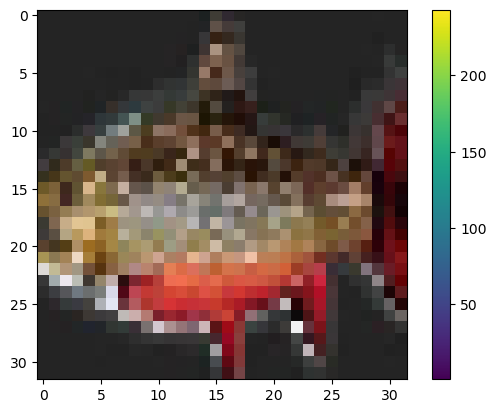

In [307]:
plt.figure()
plt.imshow(testimagenp[8])
plt.colorbar()
plt.grid(False)
plt.show()

In [308]:
testlabelsnp[8]

0

# now onto training the model and shuffling the data!!!

In [309]:
trainimagenp.shape

(282, 32, 32, 3)

In [310]:
trainlabelsnp.shape

(282,)

Want to make sure the arrays are the same shape for the first dimension so it's functional

In [311]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((completefiletrain_list, trainlabels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'trouttrain/trout zip/totalTrout/brookTrout0.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout10.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout12.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout14.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout15.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout16.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout17.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout18.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout19.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout2.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout21.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout22.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout23.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout24.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout25.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout29.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout3.jpg' 0
b'trouttrain/trout zip/totalTrout/brookTrout30.jpg' 0
b'trouttrain/trout zip/totalTro

Attaching label names to image files here which will then be shuffled.

In [312]:
ds_files_labels

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 0
(32, 32, 3) 1
(32, 32, 3) 1


ValueError: num must be 1 <= num <= 49, not 50

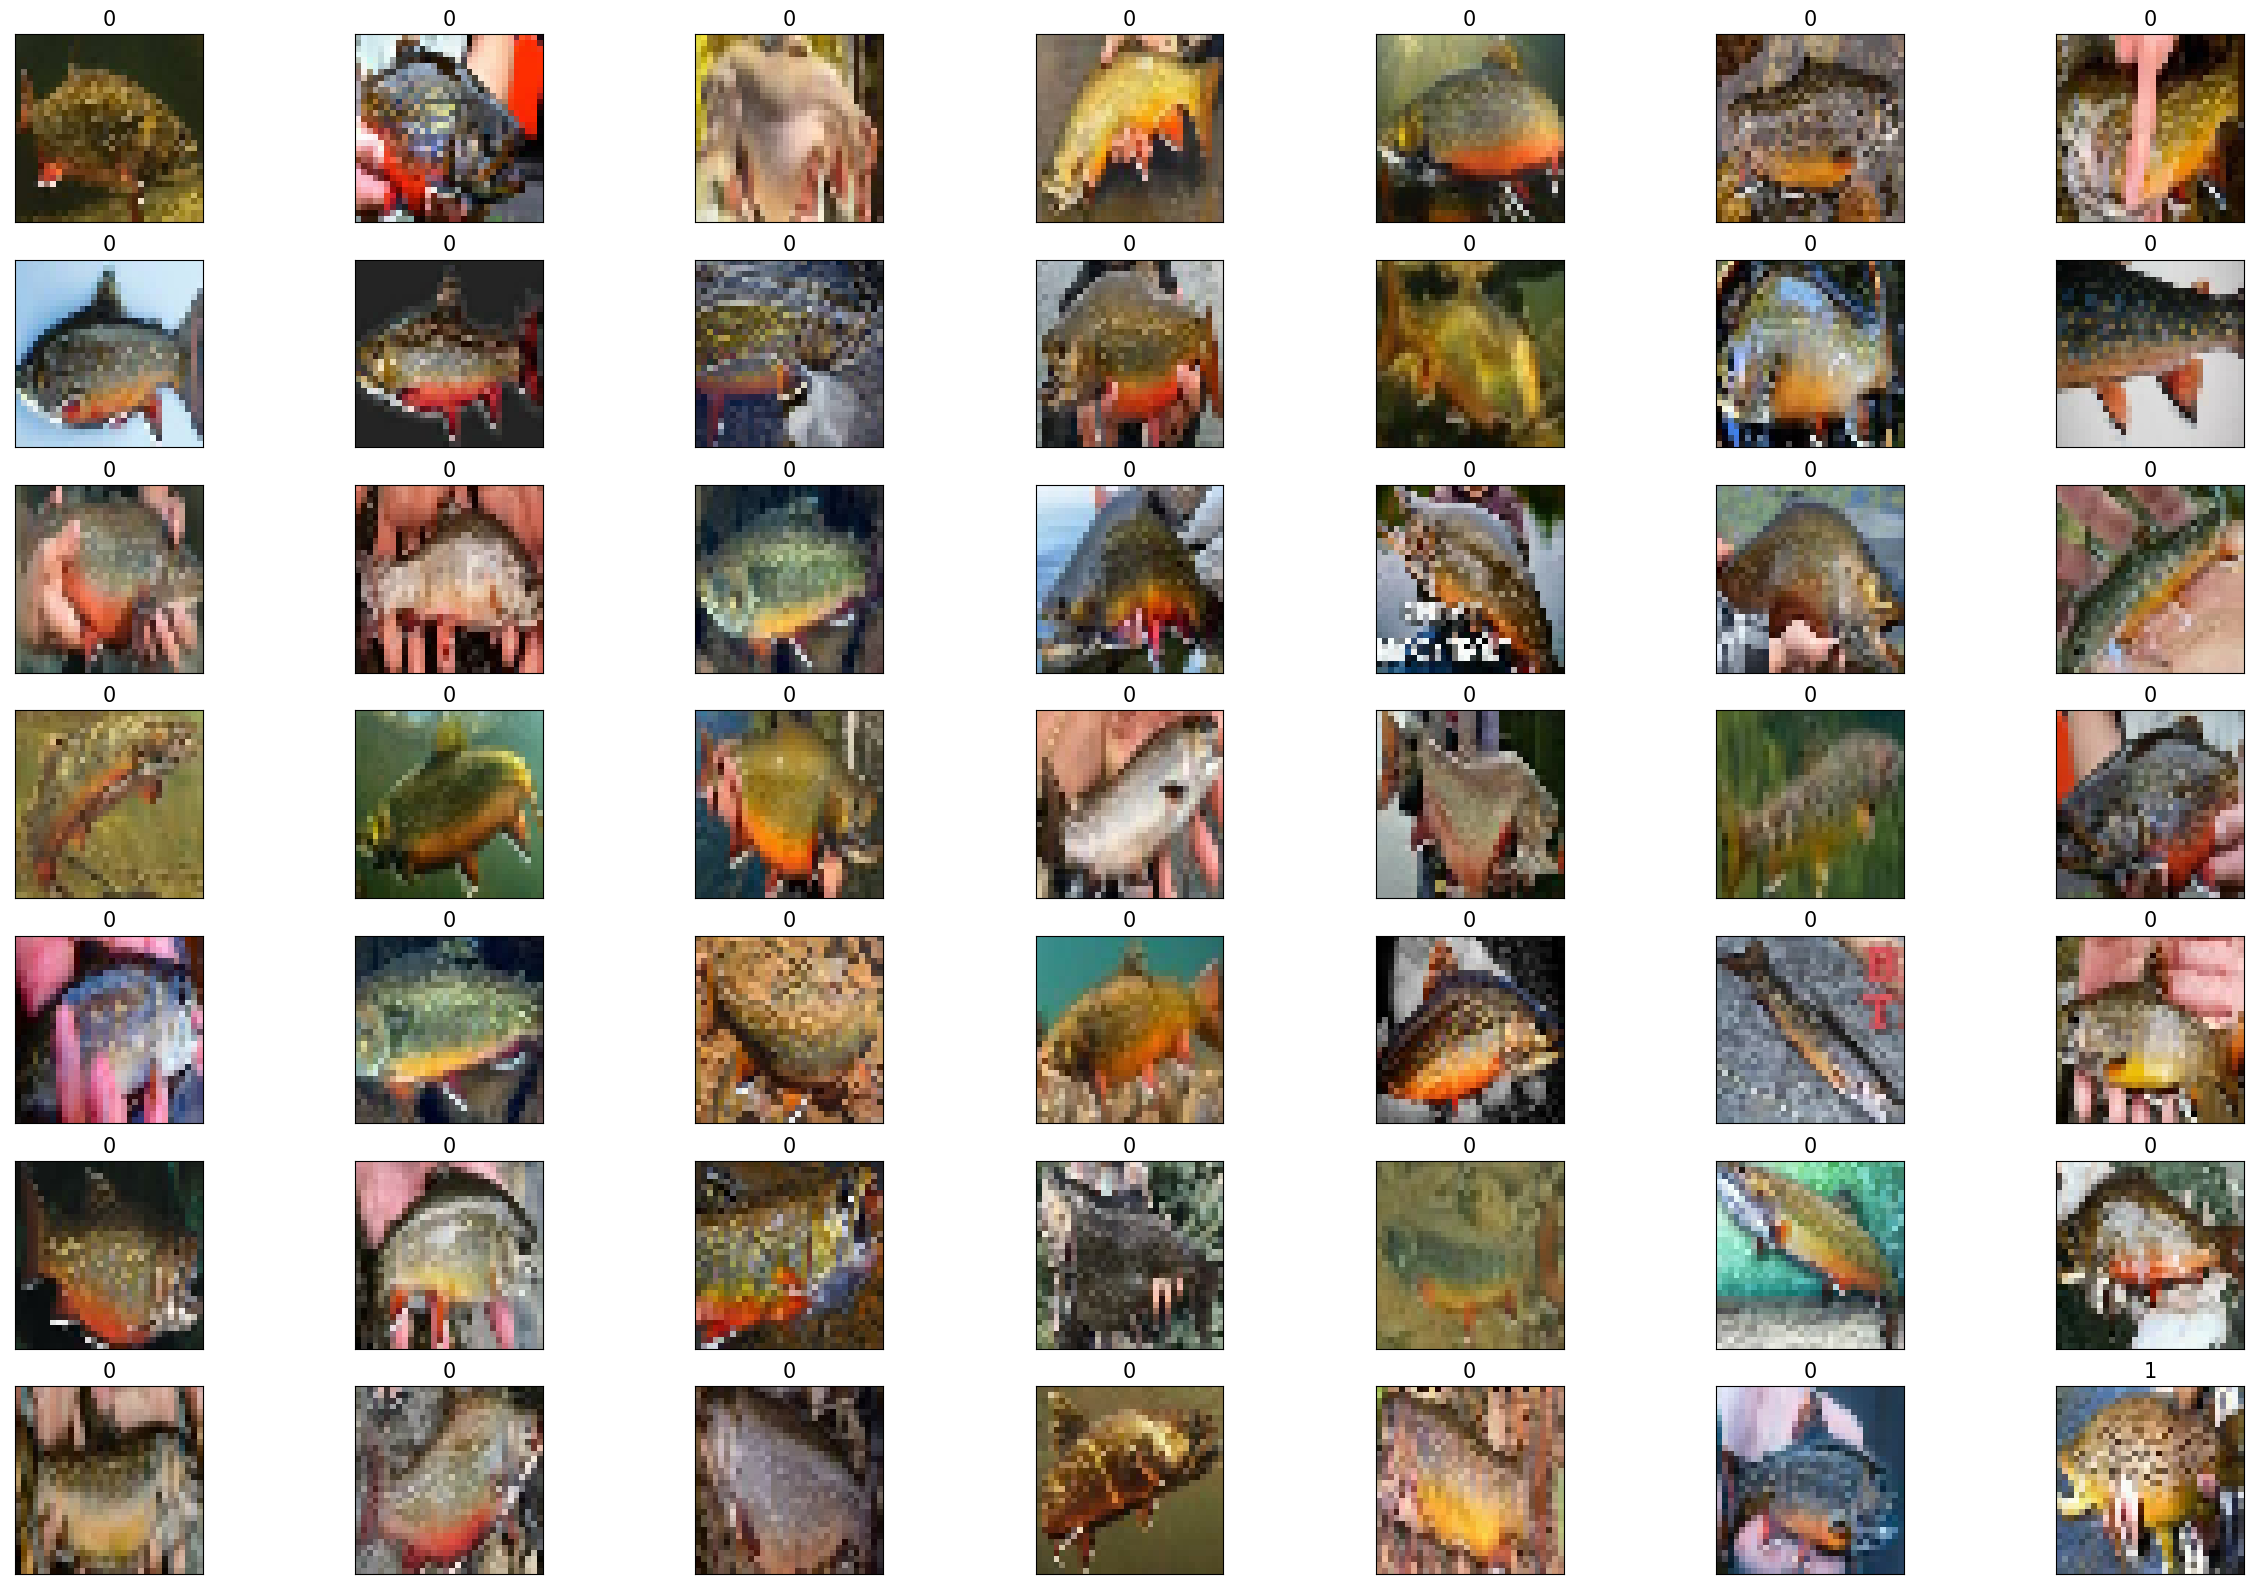

In [313]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label


img_width, img_height = 32, 32
ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(30, 20))
for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(7, 7, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), 
                 size=15)
    
plt.tight_layout()
#plt.savefig('ch13-catdog-dataset.pdf')
plt.show()

In [314]:
ds_images_labels

<MapDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [315]:
print(len(trainlabels))

282


In [316]:
ds_images_labels2 = ds_images_labels.batch(1).shuffle(3).repeat(8)

for example in ds_images_labels2:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [[[[0.63974994 0.7175686  0.7130342 ]
   [0.84756625 0.93384075 0.976978  ]
   [0.8103841  0.90450174 0.920188  ]
   ...
   [0.95274585 0.25373584 0.11592945]
   [0.9780024  0.41009307 0.31709558]
   [0.10258502 0.03125574 0.06900658]]

  [[0.55576557 0.6334789  0.62915516]
   [0.8508674  0.94173753 0.96391886]
   [0.81482846 0.9089461  0.9246324 ]
   ...
   [0.99985254 0.16798982 0.00627298]
   [0.9969037  0.18048215 0.03122702]
   [0.44525504 0.13257124 0.12668888]]

  [[0.7842563  0.8614622  0.85815334]
   [0.85872585 0.95284355 0.9532112 ]
   [0.82230395 0.9164216  0.93210787]
   ...
   [0.9860294  0.18053576 0.00343137]
   [0.97435087 0.19834559 0.01414292]
   [0.94608223 0.21903531 0.10466069]]

  ...

  [[0.5822706  0.3674058  0.28907207]
   [0.44276002 0.21715878 0.16197534]
   [0.36858723 0.1437098  0.08972695]
   ...
   [0.34519953 0.3641161  0.41033432]
   [0.3372549  0.36844364 0.41139707]
   [0.34901962 0.36133578 0.41960785]]

  [[0.21351677 0.10576938 0.0522595 ]
 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Batching and shuffling the labels and files allow for the training data to become randomized and extended when repeated so it can train the model. Its important not to overtain the model though.

In [317]:
ds_images_labels2

<RepeatDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [318]:
ds_images_labels3 = ds_images_labels2.shuffle(4).repeat(3)
batch_x, batch_y = next(iter(ds_images_labels3))
for i,(batch_x, batch_y) in enumerate(ds_images_labels3):
    print(i, batch_x.shape, batch_y.numpy())

0 (1, 32, 32, 3) [0]
1 (1, 32, 32, 3) [0]
2 (1, 32, 32, 3) [0]
3 (1, 32, 32, 3) [0]
4 (1, 32, 32, 3) [0]
5 (1, 32, 32, 3) [0]
6 (1, 32, 32, 3) [0]
7 (1, 32, 32, 3) [0]
8 (1, 32, 32, 3) [0]
9 (1, 32, 32, 3) [0]
10 (1, 32, 32, 3) [0]
11 (1, 32, 32, 3) [0]
12 (1, 32, 32, 3) [0]
13 (1, 32, 32, 3) [0]
14 (1, 32, 32, 3) [0]
15 (1, 32, 32, 3) [0]
16 (1, 32, 32, 3) [0]
17 (1, 32, 32, 3) [0]
18 (1, 32, 32, 3) [0]
19 (1, 32, 32, 3) [0]
20 (1, 32, 32, 3) [0]
21 (1, 32, 32, 3) [0]
22 (1, 32, 32, 3) [0]
23 (1, 32, 32, 3) [0]
24 (1, 32, 32, 3) [0]
25 (1, 32, 32, 3) [0]
26 (1, 32, 32, 3) [0]
27 (1, 32, 32, 3) [0]
28 (1, 32, 32, 3) [0]
29 (1, 32, 32, 3) [0]
30 (1, 32, 32, 3) [0]
31 (1, 32, 32, 3) [0]
32 (1, 32, 32, 3) [0]
33 (1, 32, 32, 3) [0]
34 (1, 32, 32, 3) [0]
35 (1, 32, 32, 3) [0]
36 (1, 32, 32, 3) [0]
37 (1, 32, 32, 3) [0]
38 (1, 32, 32, 3) [0]
39 (1, 32, 32, 3) [0]
40 (1, 32, 32, 3) [0]
41 (1, 32, 32, 3) [0]
42 (1, 32, 32, 3) [0]
43 (1, 32, 32, 3) [0]
44 (1, 32, 32, 3) [1]
45 (1, 32, 32, 3) [0

In [319]:
ds_images_labels3

<RepeatDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [320]:
print(len(testlabels))

282


# DEFINING THE MODEL

In [327]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])

In [328]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [329]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 393,989
Trainable params: 393,989
Non-trainable params: 0
_________________________________________________________________


This is defining the model so it has 3 layers given the 3 dimensions of images (height, width, and color)
and then we want to evaluate the accuracy of image prediction here.

In [331]:
history = model.fit(trainimagenp, trainlabelsnp, epochs=40)
# not sure if this should be run to further train the data

Epoch 1/40
9/9 [==============================] - 0s 4ms/step - loss: 0.8446 - accuracy: 0.8475
Epoch 2/40
9/9 [==============================] - 0s 9ms/step - loss: 1.7191 - accuracy: 0.8014
Epoch 3/40
9/9 [==============================] - 0s 5ms/step - loss: 0.6218 - accuracy: 0.8901
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 1.2356 - accuracy: 0.8227
Epoch 5/40
9/9 [==============================] - 0s 4ms/step - loss: 4.5101 - accuracy: 0.6135
Epoch 6/40
9/9 [==============================] - 0s 4ms/step - loss: 4.3890 - accuracy: 0.6383
Epoch 7/40
9/9 [==============================] - 0s 7ms/step - loss: 4.2995 - accuracy: 0.6383
Epoch 8/40
9/9 [==============================] - 0s 4ms/step - loss: 3.6771 - accuracy: 0.7163
Epoch 9/40
9/9 [==============================] - 0s 9ms/step - loss: 2.5619 - accuracy: 0.7872
Epoch 10/40
9/9 [==============================] - 0s 4ms/step - loss: 0.9594 - accuracy: 0.8511
Epoch 11/40
9/9 [======================

This was us putting the training data into the model so the model is now being trained on the shuffled labels/images and array of labels/images.Below is setting up the subplot so it can show us the accuracy of predictions.

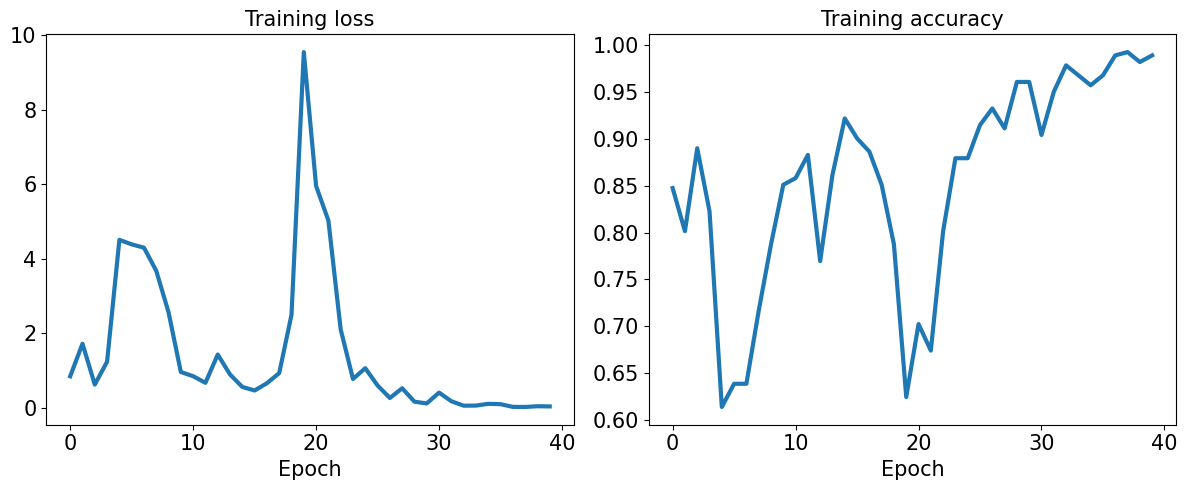

In [332]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('ch13-cls-learning-curve.pdf')

plt.show()

Here we see information regarding our accuracy.

In [333]:
test_loss, test_acc = model.evaluate(testimagenp,  testlabelsnp , verbose=2)

print('\nTest accuracy:', test_acc)

9/9 - 0s - loss: 0.0380 - accuracy: 0.9787 - 127ms/epoch - 14ms/step

Test accuracy: 0.978723406791687


In [334]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [335]:
predictions = probability_model.predict(testimagenp)

9/9 [==============================] - 0s 2ms/step


Here we are actually using our model to now predict images and give us the accuracy of that prediction.

In [336]:
predictions[8]

array([9.9999422e-01, 3.4217978e-10, 4.3731521e-09, 3.8829406e-10,
       5.6917961e-06], dtype=float32)

In [337]:
np.argmax(predictions[8])

0

In [338]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Here we color code the graphs so if it's correct it's blue and if not then it's red while also giving predicted precentages in comparing all of the potential trout options.

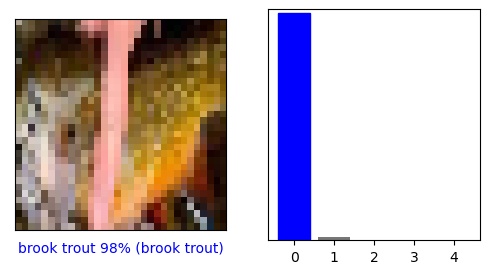

In [339]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],testlabelsnp,  testimagenp)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testlabelsnp)
plt.show()

this one was right

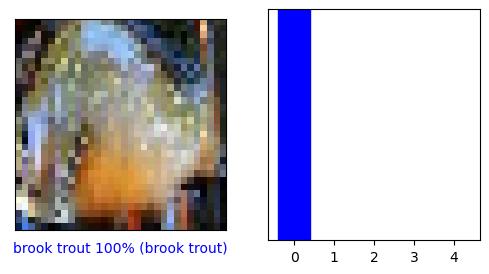

In [340]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],testlabelsnp,  testimagenp)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testlabelsnp)
plt.show()

oh okay so this one was also correct

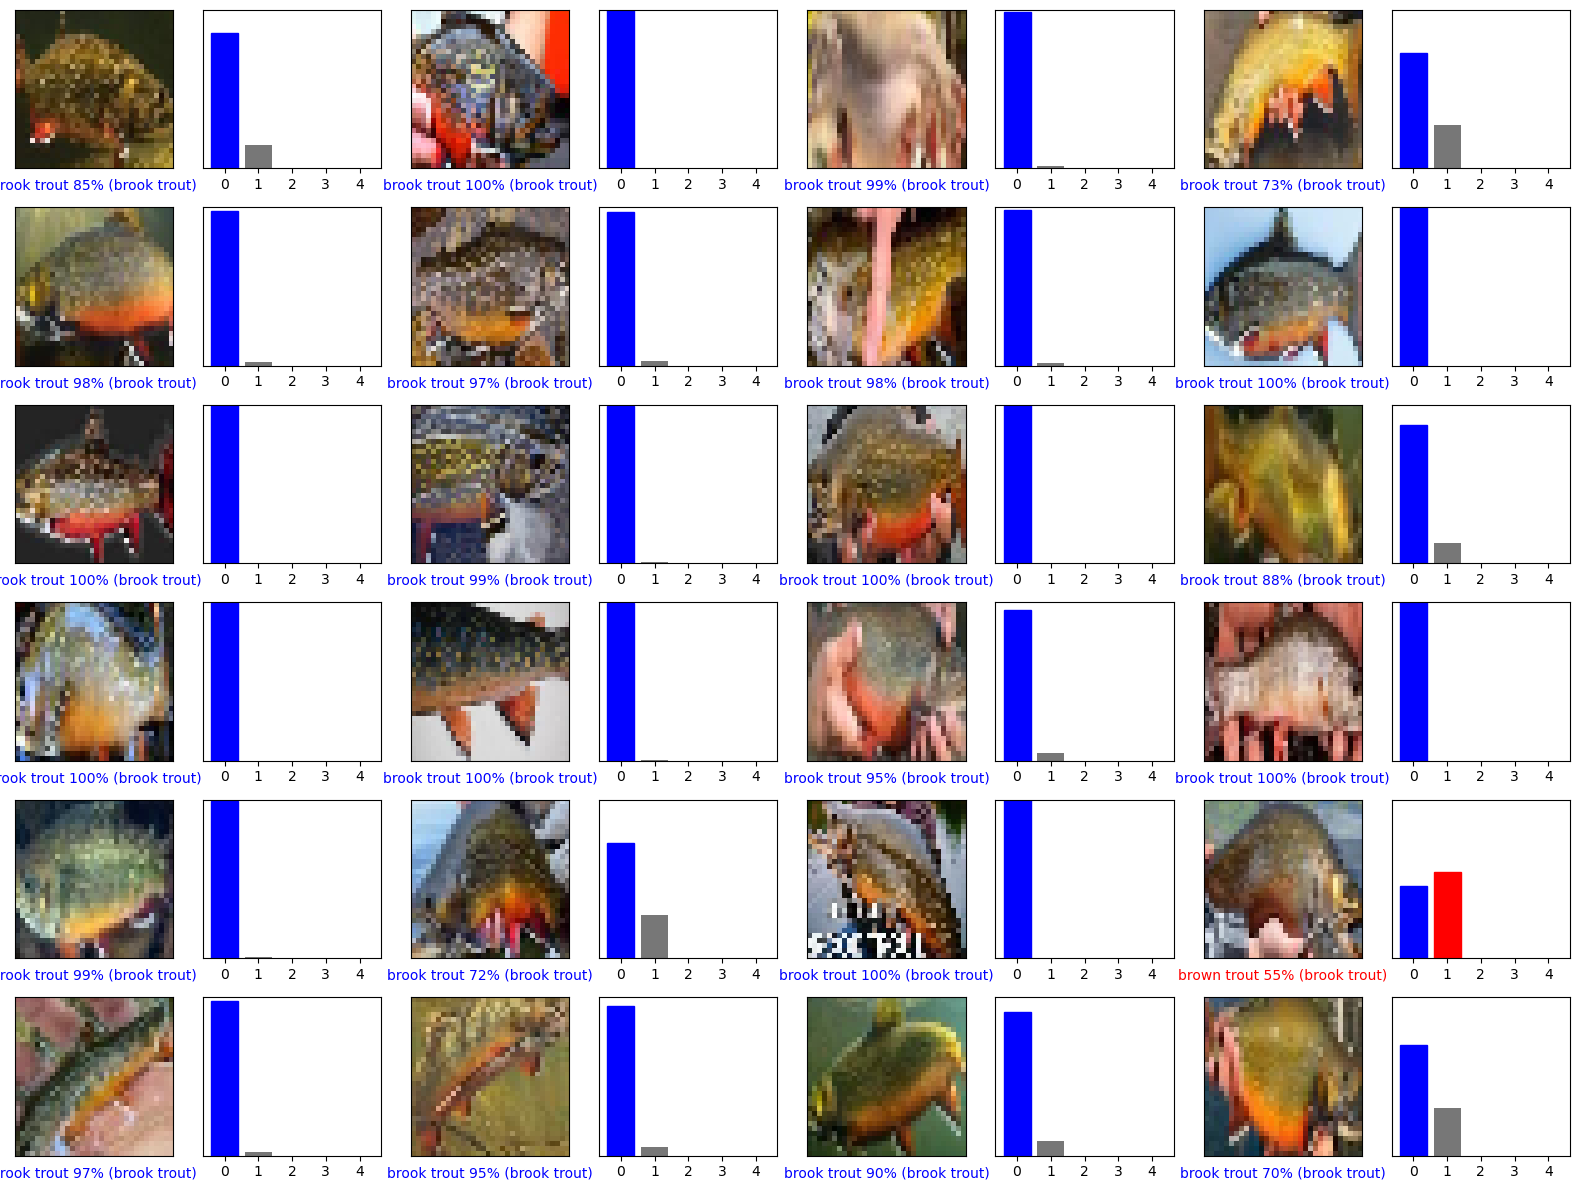

In [341]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testlabelsnp, testimagenp)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], testlabelsnp)
plt.tight_layout()
plt.show()

Finally now we just do a lot of predictions using the model, seeing most predictions are correct with a few being innacurate.

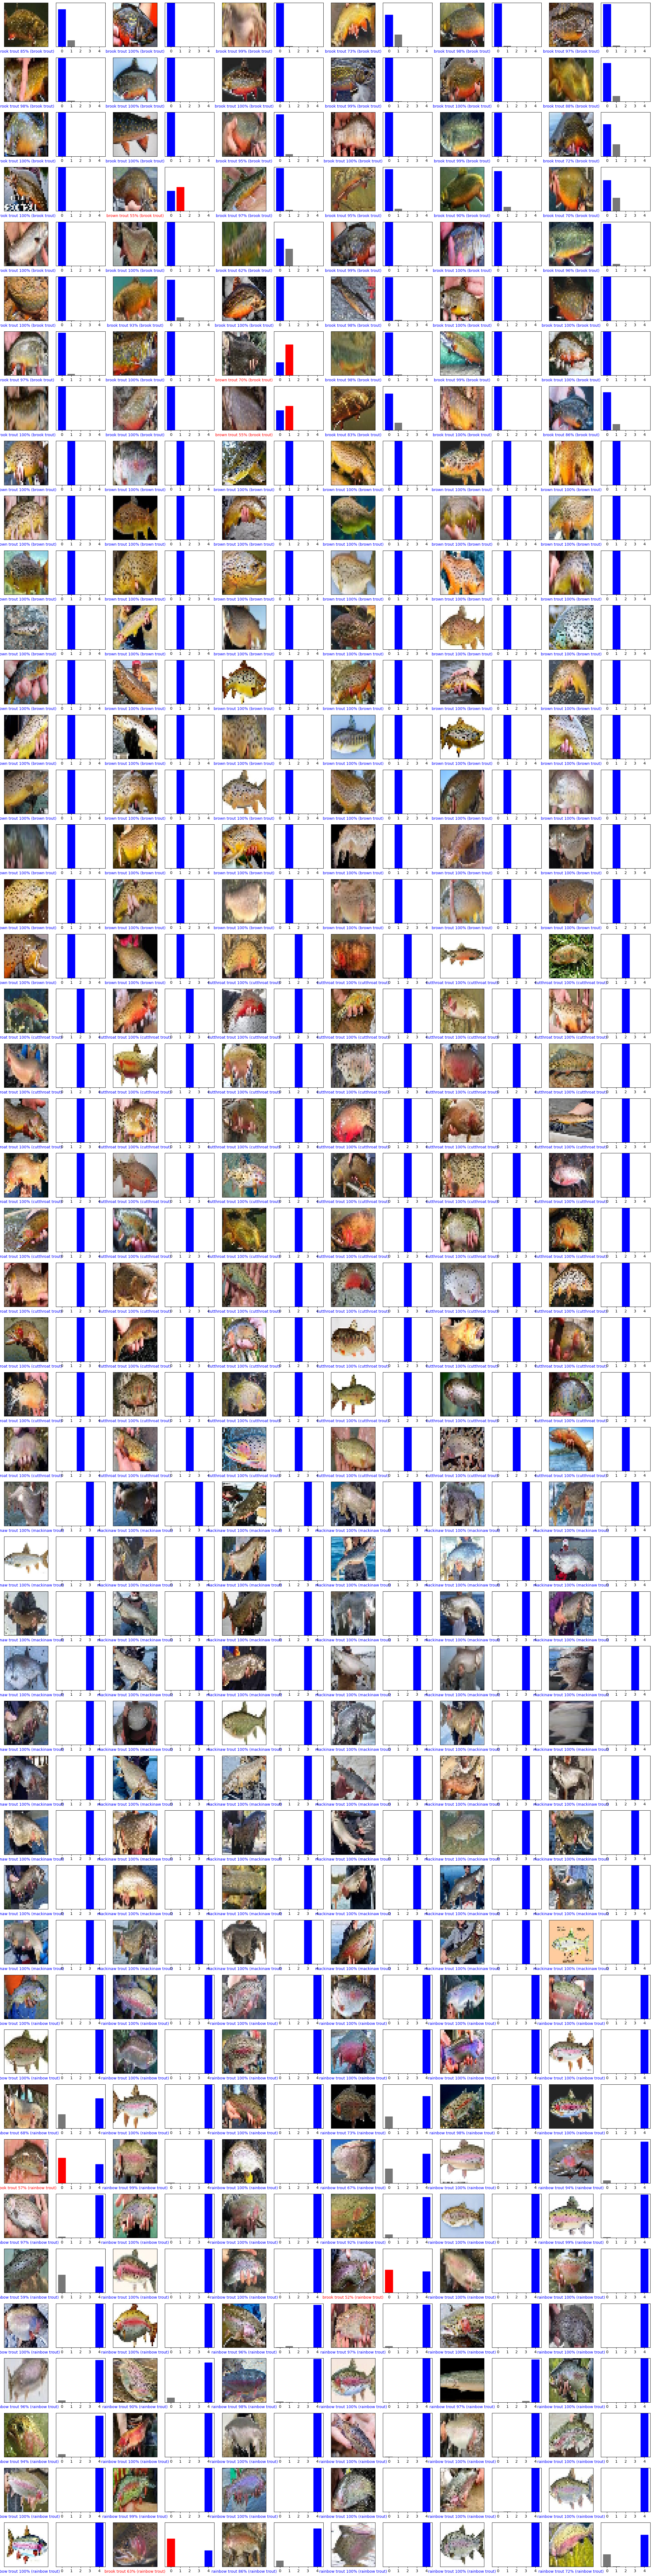

In [343]:
num_rows = 47
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testlabelsnp, testimagenp)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], testlabelsnp)
plt.tight_layout()
plt.show()

And this is essentially some of the foundational code that leads up to our smaller application sized fish image identification code. If you have questions on this, please reach out!